## Digital Image Processing: DATA 56600-002 
## Sampling and Quantization
### Seth Howells

In digital image processing, an image is a function of space and must be digitized both spatially and in amplitude. For example, the 2D image of the yellow and red ball still captures the 3D scene’s depth, which the viewer would interpret as the red ball being located behind the yellow ball. This is because the images we see are formed by two-dimensional analog signals along with color information along the x-y spatial axis. 

Examples of analog images are television images, photographs, paintings, medical images, etc. These examples are generally: 
real-world but not great in quality, 
continuous and not broken into components, 
processes only two-dimensional signals. 

The two operations contained in this notebook are Sampling and Quantization. Each operation will digitalize the image and output the resulting image. The example image used in this notebook is from Cal-Tech's Image Dataset under "sunflower" objects.

Image Dataset: http://www.vision.caltech.edu/Image_Datasets/Caltech101/#Download

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://camo.githubusercontent.com/3096829a86b6c72e4e360b8b6852be4320e2a25d6d8b4e20709ea672ef20578c/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313039322f312a766644655839484835544777593263677942757546412e706e67",width=400,height=400)

## SAMPLING

Sampling refers to the discretization of the space, which can occur in downsampling and upsampling. Downsampling is the reduction of spatial resolution while retaining the pixel structures. The higher the sampling rate, the more blocky the resulting image. The rate determines the area size (or amount of pixels) to be reduced into a single value that averages the color.

Below are the results of increasing the sampling rates from 1 (original) to 50.

In [2]:
import numpy as np
from skimage import data
from PIL import Image
from matplotlib import pyplot as plt
import skimage.measure 

# Read in image
image = plt.imread('/Users/datascience/Downloads/101_ObjectCategories/sunflower/image_0045.jpg')

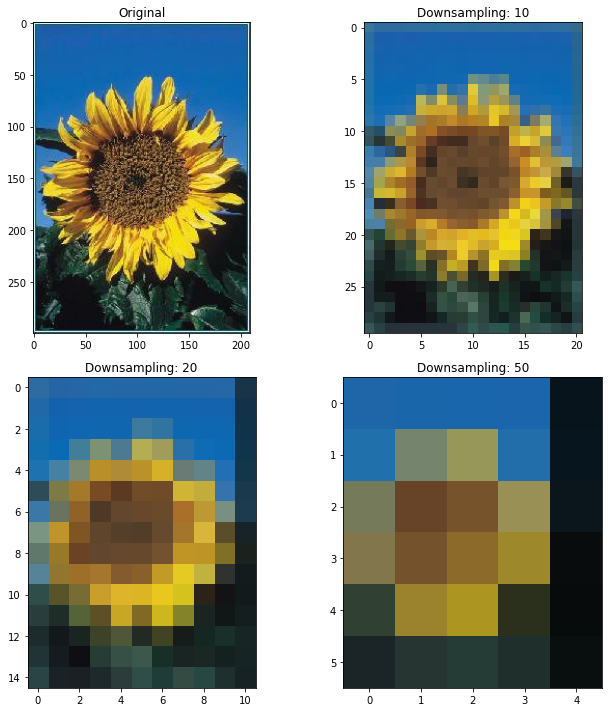

In [3]:
# Convert image array to numpy array
img_array = np.asarray(image, dtype='int32')

imex = image[:,:,:]

def downsample(rate):
    # change to 0-1
    ds_array = img_array/255

    # Split image by RGB and apply mean-based downsampling
    r = skimage.measure.block_reduce(ds_array[:, :, 0],(rate, rate),func=np.mean)
    g = skimage.measure.block_reduce(ds_array[:, :, 1],(rate, rate),func=np.mean)
    b = skimage.measure.block_reduce(ds_array[:, :, 2],(rate, rate),func=np.mean)
    ds_array = np.stack((r,g,b), axis=-1)
    
    return ds_array 

# Plot downsampling at different levels
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(image)
axarr[0,0].set_title('Original')


axarr[0,1].imshow(downsample(rate=10))
axarr[0,1].set_title('Downsampling: 10')

axarr[1,0].imshow(downsample(rate=20))
axarr[1,0].set_title('Downsampling​: 20')

axarr[1,1].imshow(downsample(rate=50))
axarr[1,1].set_title('Downsampling: 50')

f.set_size_inches(10,10)
f.tight_layout()

## QUANTIZATION

While sampling covered the spatial resolution, Quantization refers to the discretization of the intensity values. A colors RGB value indicates the red, blue, and green intensity which together represent the color the pixel is on the resulting image. Each RGB intensity value is on a scale of 0 to 255.

Because the image is a matrix consisting of RGB intensity values, each RGB color can be extracted and analyzed. 

Quantization images by RGB split:


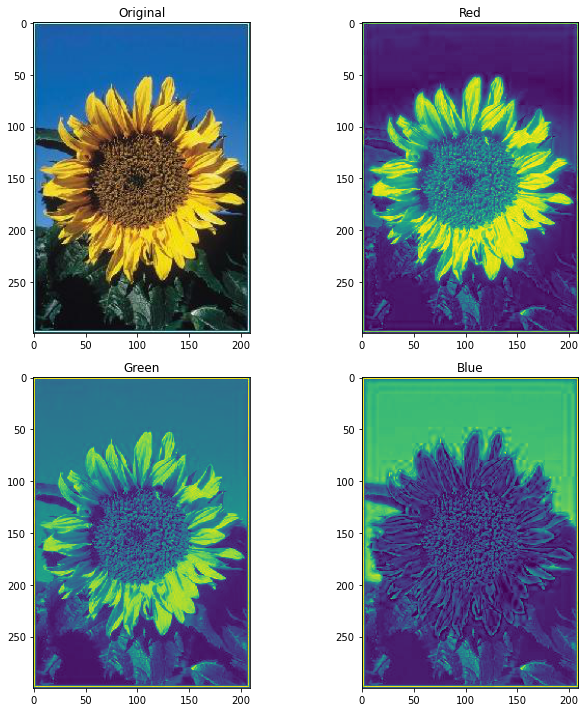

In [4]:
# Split red, green and blue color channels
r=image[:,:,0]  
g=image[:,:,1]
b=image[:,:,2]

print("Quantization images by RGB split:")
f, axarr = plt.subplots(2,2)

axarr[0,0].imshow(image)
axarr[0,0].set_title('Original')

axarr[0,1].imshow(r)
axarr[0,1].set_title('Red')

axarr[1,0].imshow(g)
axarr[1,0].set_title('Green')

axarr[1,1].imshow(b)
axarr[1,1].set_title('Blue')

f.set_size_inches(10,10)
f.tight_layout()

### Histograms of RGB split

Splitting the image based on RGB values can not only produce a visibly different resulting image, but it can also extract the RGB intensity values and store them in an array to analyze the color value distribution and frequency of pixels.

Text(0, 0.5, 'Pixel Count')

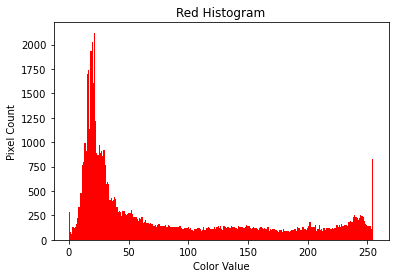

In [5]:
# Plot the the red histogram with bins in a range of 256
plt.hist(r.ravel(), bins=256, color='red')
plt.title('Red Histogram')
plt.xlabel('Color Value')
plt.ylabel('Pixel Count')

Text(0, 0.5, 'Pixel Count')

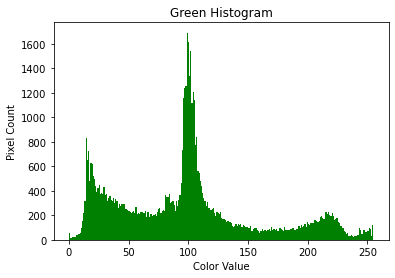

In [6]:
# Plot the the green histogram with bins in a range of 256
plt.hist(g.ravel(), bins=256, color='green')
plt.title('Green Histogram')
plt.xlabel('Color Value')
plt.ylabel('Pixel Count')

Text(0, 0.5, 'Pixel Count')

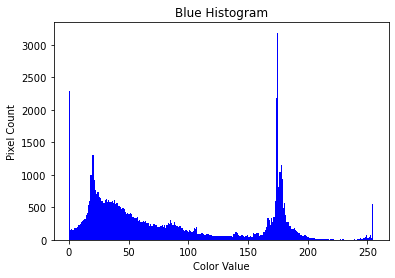

In [7]:
# Plot the the blue histogram with bins in a range of 256
plt.hist(b.ravel(), bins=256, color='blue')
plt.title('Blue Histogram')
plt.xlabel('Color Value')
plt.ylabel('Pixel Count')

### Grayscale 

Quantization of images allows an image to be modified by the weighted mean of RGB intensity values. As a result, an image can be set to grayscale while retaining the ability to manipulate each RGB intensity value weight.

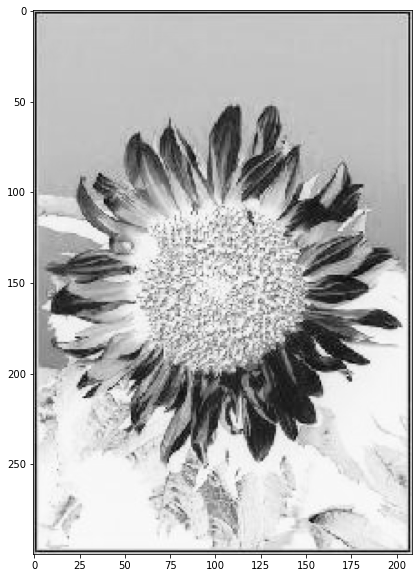

In [8]:
def to_grayscale(image, weights = np.c_[10, 50, .1]):
    """
    Assigns matrix weights to be applied to
    the mean of RGB intensity values.
    """
    tile = np.tile(weights, reps=(image.shape[0],image.shape[1],1))
    return np.sum(tile * image, axis=2)

gs_image = to_grayscale(image)
plt.figure(figsize=(10,10))
plt.imshow(gs_image, cmap='Greys')

## CONCLUSIONS

Sampling as an overall concept of spatially analyzing the image appealed to me initially because of the simplicity in downsampling, which plays a fundamental role in digital image processing as well as computer vision. Manipulating the rate of downsampling made clear that sampling in general refers to the spatial resolution of the image. 

Quantization of the image produced unexpected results, which makes sense since quantization manipulates the intensity values. For example, the RGB split was able to manipulate the red, blue, and green colors in the sunflower image and as a result, each of the RGB split images returned a wildly different image of the same sunflower. The Blue split highlights the petal structure and texture better than the Red or Green. The Red split on the other hand intensified the brightness of the yellow petals and light-brown seeds. And finally, the Grayscale image captured the petals and seed structure fairly well and could be used to separate the background from the foreground. 
